# Gradient Boosting Classification with Scikit-Learn
We will be using the breast cancer dataset that is prebuilt into scikit-learn to use as example data. First off, let’s get some imports out of the way:

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

seed = 999

Here, we are just importing pandas, numpy, our model, and a metric to evaluate our model’s performance.

In [63]:
df = pd.DataFrame(load_breast_cancer()['data'], 
                  columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = seed)

In [23]:
df.shape

(569, 31)

For convenience sake, we will convert the data into a DataFrame because it’s easier to manipulate that way. Feel free to skip this step.

Here, we define our features and our label, and split ur data into a train and validation using 5 Fold cross validation.

In [24]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

There is a lot of parameters here, so I will only cover the most important:
- Criterion: The loss function used to find the optimal feature and threshold to split the data
- learning_rate: this parameter scales the contribution of each tree
- max_depth: the maximum depth of each tree
- n_estimators: the number of trees to construct
- init: the initial estimator. By default, it is the log(odds) converted to a probability(like we discussed before)

In [26]:
gradient_booster.fit(Xtrain,ytrain)
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
estimator = GradientBoostingClassifier()

In [32]:
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 'min_samples_leaf': [10, 20, 50], 'learning_rate': [0.1, 0.01]}

In [33]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV 5/5

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [35]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [36]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	learning_rate: 0.1
	max_depth: 100
	min_samples_leaf: 10
	n_estimators: 500


In [53]:
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [54]:
print(classification_report(ytest,cv_grid.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.97      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



Confusion Matrix : 
 [[ 67   3]
 [  3 115]]
Accuracy Score is 0.9681
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.97      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

AUC-ROC: 0.965859564164649
LOGLOSS Value is 1.1023


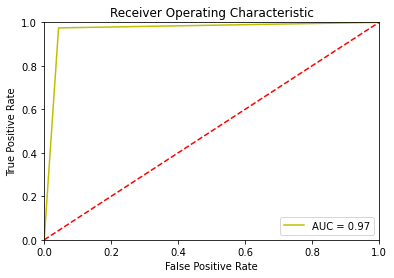

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc

ypred = cv_grid.predict(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(ytest, ypred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(ytest, ypred)))
print ('Classification Report : \n', classification_report(ytest, ypred))
print('AUC-ROC:',roc_auc_score(ytest, ypred))
print('LOGLOSS Value is %.4f' % log_loss(ytest, ypred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()